<a href="https://colab.research.google.com/github/subhadrashaw/project/blob/main/Product_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODUCT MATCHING USING MACHINE LEARNING

# Importing Libraries

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Reading data from csv files

In [104]:
amazon = pd.read_csv('amazon.csv')
amazon.head(10)

,amazonuniq_id,amazonproduct_name,amazonretail_price,amazondiscounted_price,amazondescription,amazonoverall_rating,amazonbrand
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,982,438,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,32143,29121,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,991,551,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,AW
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,694,325,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,208,258,Specifications of Sicons All Purpose Arnica Do...,No rating available,Sicons
5,c2a17313954882c1dba461863e98adf2,Eternal Gandhi Super Series Crystal Paper Weig...,427,473,Key Features of Eternal Gandhi Super Series Cr...,No rating available,Eternal Gandhi
6,ce5a6818f7707e2cb61fdcdbba61f5ad,Alisha Solid Women's Cycling Shorts,1198,602,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha
7,8542703ca9e6ebdf6d742638dfb1f2ca,FabHomeDecor Fabric Double Sofa Bed,32137,28664,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,FabHomeDecor
8,29c8d290caa451f97b1c32df64477a2c,"dilli bazaaar Bellies, Corporate Casuals, Casuals",682,385,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,dilli bazaaar
9,4044c0ac52c1ee4b28777417651faf42,Alisha Solid Women's Cycling Shorts,1197,542,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha


In [105]:
amazon.shape

(20000, 7)

In [106]:
flipkart = pd.read_csv('flipkart_com-ecommerce_sample.csv')
flipkart.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [107]:
flipkart.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [108]:
flipkart.shape

(20000, 15)

# Pre-processing Data

In [109]:
 #keep only those columns whicha are required for data processing
 flipkart = flipkart[['uniq_id','product_name','retail_price','discounted_price','description','product_rating','brand']]


In [110]:
flipkart.head(5)

,uniq_id,product_name,retail_price,discounted_price,description,product_rating,brand
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,AW
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,No rating available,Sicons


In [111]:
# dropping the outliers.

wild_card = flipkart[flipkart.discounted_price > 1000].index

flipkart = flipkart.drop(wild_card)
amazon = amazon.drop(wild_card)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Products')

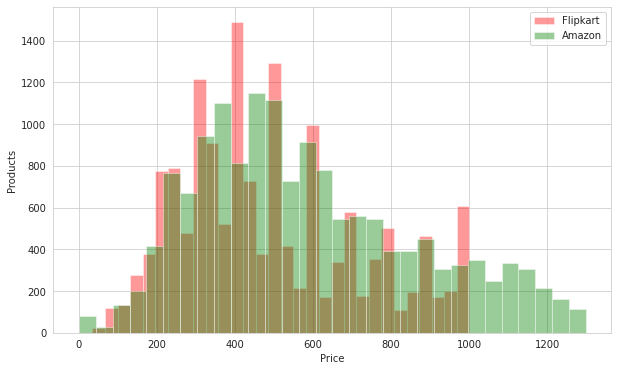

In [112]:
plt.figure(figsize=(10, 6))
sns.distplot(flipkart.discounted_price, color='red', label="Flipkart", kde=False, bins=30)
sns.distplot(amazon.amazondiscounted_price, color='green', label="Amazon", kde=False, bins=30)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Products')

In [113]:
#Merging the tables of amazon and flipkart
flipkart.columns = ['uniq_id','flipkartproduct_name','flipkartretail_price','flipkartdiscounted_price','flipkartdescription','flipkartoverall_rating','flipkartbrand']

amazon.columns = ['uniq_id','amazonproduct_name','amazonretail_price','amazondiscounted_price','amazondescription','amazonoverall_rating','amazonbrand']

df = pd.merge(flipkart, amazon, how='outer')
df = df.drop_duplicates()

In [114]:
df.head(5)

,uniq_id,flipkartproduct_name,flipkartretail_price,flipkartdiscounted_price,flipkartdescription,flipkartoverall_rating,flipkartbrand,amazonproduct_name,amazonretail_price,amazondiscounted_price,amazondescription,amazonoverall_rating,amazonbrand
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha,Alisha Solid Women's Cycling Shorts,982,438,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha
1,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,AW,AW Bellies,991,551,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,AW
2,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha,Alisha Solid Women's Cycling Shorts,694,325,Key Features of Alisha Solid Women's Cycling S...,No rating available,Alisha
3,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,No rating available,Sicons,Sicons All Purpose Arnica Dog Shampoo,208,258,Specifications of Sicons All Purpose Arnica Do...,No rating available,Sicons
4,c2a17313954882c1dba461863e98adf2,Eternal Gandhi Super Series Crystal Paper Weig...,430.0,430.0,Key Features of Eternal Gandhi Super Series Cr...,No rating available,Eternal Gandhi,Eternal Gandhi Super Series Crystal Paper Weig...,427,473,Key Features of Eternal Gandhi Super Series Cr...,No rating available,Eternal Gandhi


In [115]:
#dropping unnecessary columns
cols_to_drop = ['flipkartoverall_rating','amazonoverall_rating', 'flipkartdescription', 'amazondescription', 'flipkartbrand', 'amazonbrand']
df.drop(cols_to_drop, axis=1, inplace=True)
df.columns = ['uniq_id', 'flipkartproduct_name', 'flipkartretail_price','flipkartdiscounted_price', 'amazonproduct_name','amazonretail_price','amazondiscounted_price']

In [116]:
df

,uniq_id,flipkartproduct_name,flipkartretail_price,flipkartdiscounted_price,amazonproduct_name,amazonretail_price,amazondiscounted_price
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha Solid Women's Cycling Shorts,982,438
1,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,999.0,499.0,AW Bellies,991,551
2,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha Solid Women's Cycling Shorts,694,325
3,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons All Purpose Arnica Dog Shampoo,208,258
4,c2a17313954882c1dba461863e98adf2,Eternal Gandhi Super Series Crystal Paper Weig...,430.0,430.0,Eternal Gandhi Super Series Crystal Paper Weig...,427,473
...,...,...,...,...,...,...,...
15085,a38fc11b1f6dc2d38bf38fae03ab6743,Elite Collection Medium Acrylic Sticker,1299.0,999.0,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1282,1164
15086,7415e1a421fb468d25a5ea56350f44be,Wallmantra Large Vinyl Stickers Sticker,727.0,582.0,WALLMANTRA LARGE VINYL STICKERS STICKER,709,721
15087,7179d2f6c4ad50a17d014ca1d2815156,WallDesign Small Vinyl Sticker,1500.0,730.0,WALLDESIGN SMALL VINYL STICKER,1498,876
15088,93e9d343837400ce0d7980874ece471c,Elite Collection Medium Acrylic Sticker,1299.0,999.0,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1284,1196


In [117]:
f_minus_a = df['flipkartdiscounted_price'] - df['amazondiscounted_price']
a_minus_f = df['amazondiscounted_price'] - df['flipkartdiscounted_price'] 

In [118]:
#calculating the price differences between amazon and flipkart
df['price_diff'] = df['amazondiscounted_price'] - df['flipkartdiscounted_price']
df.price_diff.describe()

count    15012.000000
mean        98.128364
std         56.118550
min          4.000000
25%         56.000000
50%         86.000000
75%        128.000000
max        299.000000
Name: price_diff, dtype: float64

In [119]:
df['price_diff_perc'] = df['price_diff']/df['amazondiscounted_price']*100
df

,uniq_id,flipkartproduct_name,flipkartretail_price,flipkartdiscounted_price,amazonproduct_name,amazonretail_price,amazondiscounted_price,price_diff,price_diff_perc
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha Solid Women's Cycling Shorts,982,438,59.0,13.470320
1,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,999.0,499.0,AW Bellies,991,551,52.0,9.437387
2,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha Solid Women's Cycling Shorts,694,325,58.0,17.846154
3,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons All Purpose Arnica Dog Shampoo,208,258,48.0,18.604651
4,c2a17313954882c1dba461863e98adf2,Eternal Gandhi Super Series Crystal Paper Weig...,430.0,430.0,Eternal Gandhi Super Series Crystal Paper Weig...,427,473,43.0,9.090909
...,...,...,...,...,...,...,...,...,...
15085,a38fc11b1f6dc2d38bf38fae03ab6743,Elite Collection Medium Acrylic Sticker,1299.0,999.0,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1282,1164,165.0,14.175258
15086,7415e1a421fb468d25a5ea56350f44be,Wallmantra Large Vinyl Stickers Sticker,727.0,582.0,WALLMANTRA LARGE VINYL STICKERS STICKER,709,721,139.0,19.278779
15087,7179d2f6c4ad50a17d014ca1d2815156,WallDesign Small Vinyl Sticker,1500.0,730.0,WALLDESIGN SMALL VINYL STICKER,1498,876,146.0,16.666667
15088,93e9d343837400ce0d7980874ece471c,Elite Collection Medium Acrylic Sticker,1299.0,999.0,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1284,1196,197.0,16.471572


In [120]:
df.price_diff_perc.describe()

count    15012.000000
mean        16.492315
std          4.029699
min          9.090909
25%         13.064936
50%         16.706444
75%         20.023267
max         23.076923
Name: price_diff_perc, dtype: float64

In [121]:
max_price = []
min_price = []
l = list()
for i, row in df.iterrows():
    if row['amazondiscounted_price'] < row['flipkartdiscounted_price']:
        max_price.append(row['flipkartdiscounted_price'])
        min_price.append(row['amazondiscounted_price'])
    else:
        max_price.append(row['amazondiscounted_price'])
        min_price.append(row['flipkartdiscounted_price'])

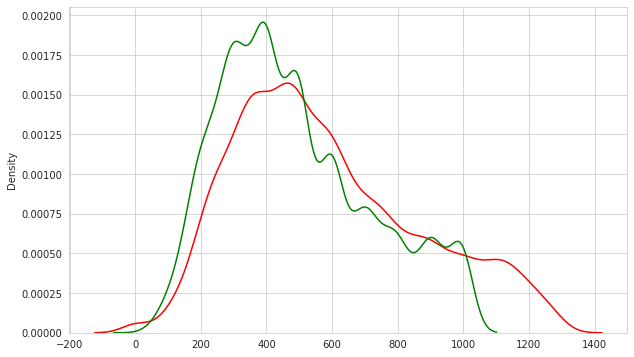

In [122]:
plt.figure(figsize=(10, 6))
sns.kdeplot(max_price, color='red')
sns.kdeplot(min_price, color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price Difference (Percentage)')

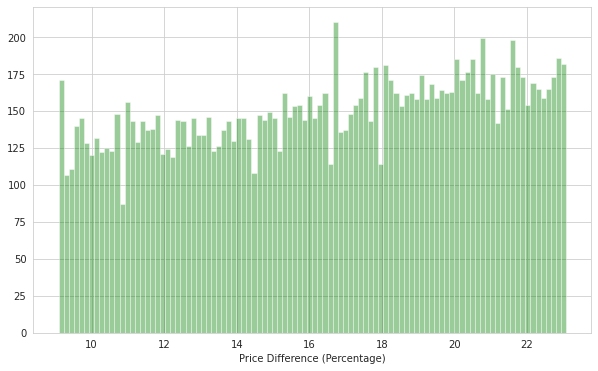

In [123]:
plt.figure(figsize=(10, 6))
sns.distplot(abs(df['price_diff_perc']), kde=False, color='green', bins=100)
plt.xlabel('Price Difference (Percentage)')

In [127]:
no_diff = df[df['price_diff'] == 0].count()[0]/df.shape[0]
print('Percentage of products which are priced the same: {0:.2f}%'.format(no_diff*100))

print()
no_diff = df[(abs(df['price_diff_perc']) > 0) & (abs(df['price_diff_perc']) < 100)].count()[0]/df.shape[0]
print('Percentage of products with price difference: {0:.2f}%'.format(no_diff*100))

print()
no_diff = df[df['price_diff_perc'] < 0].count()[0]/df.shape[0]
print('Better pricing on Amazon: {0:.2f}%'.format(no_diff*100))

print()
no_diff = df[df['price_diff_perc'] > 0].count()[0]/df.shape[0]
print('Better pricing on Flipkart: {0:.2f}%'.format(no_diff*100))

Percentage of products which are priced the same: 0.00%

Percentage of products with price difference: 99.48%

Better pricing on Amazon: 0.00%

Better pricing on Flipkart: 99.48%


In [128]:
df.count()

uniq_id                     15090
flipkartproduct_name        15090
flipkartretail_price        15012
flipkartdiscounted_price    15012
amazonproduct_name          15090
amazonretail_price          15090
amazondiscounted_price      15090
price_diff                  15012
price_diff_perc             15012
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Products')

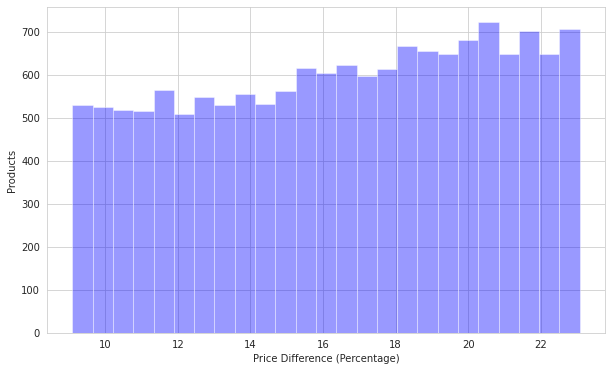

In [129]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price_diff_perc'], kde=False, color='blue')
plt.xlabel('Price Difference (Percentage)')
plt.ylabel('Products')

In [130]:
df.columns

Index(['uniq_id', 'flipkartproduct_name', 'flipkartretail_price',
       'flipkartdiscounted_price', 'amazonproduct_name', 'amazonretail_price',
       'amazondiscounted_price', 'price_diff', 'price_diff_perc'],
      dtype='object')

In [131]:
df = df.drop(['uniq_id', 'price_diff', 'price_diff_perc'], axis=1)


In [132]:
df.columns = ['Product name in Flipkart', 'Retail Price in Flipkart', 'Discounted Price in Flipkart', 'Product name in Amazon', 'Retail Price in Amazon', 'Discounted Price in Amazon']

In [133]:
df.head(5)

,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha Solid Women's Cycling Shorts,982,438
1,AW Bellies,999.0,499.0,AW Bellies,991,551
2,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha Solid Women's Cycling Shorts,694,325
3,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons All Purpose Arnica Dog Shampoo,208,258
4,Eternal Gandhi Super Series Crystal Paper Weig...,430.0,430.0,Eternal Gandhi Super Series Crystal Paper Weig...,427,473


In [136]:
print(df[df['Product name in Flipkart']=="FDT Women's Leggings from Flipkart"])

Empty DataFrame
Columns: [Product name in Flipkart, Retail Price in Flipkart, Discounted Price in Flipkart, Product name in Amazon, Retail Price in Amazon, Discounted Price in Amazon]
Index: []


In [140]:
df[df['Product name in Flipkart']=="AW Bellies"]

,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
1,AW Bellies,999.0,499.0,AW Bellies,991,551
